In [1]:
%autosave 0

Autosave disabled


# 8. Neural networks and deep learning

This week, we'll learn about neural nets and build a model for classifying images of clothes.
- Convolutional neural networks for image classification
- TensorFlow and Keras -- frameworks for building neural networks
- Using pretrained neural networks
- Internals of a convolutional neural network
- Training a model with transfer learning
- Data augmentations--the process of generating more training data

We'll be working with multiclass image classification with deep learning. The deep learning frameworks like TensorFlow and Keras will be implemented on clothing dataset to classify images of t-shirts.

The dataset has 5000 images of 20 different classes, however, we'll be using the subset which contains 10 of the most popular classes. The dataset can be downloaded from the below link.

The materials of this week will help you start using neural networks and perform any similar image classification project.

## 8.1 Fashion classification

Imagine that we work at an online fashion marketplace. Our users upload thousands of images every day to sell their clothes. We want to help our users create listings faster by automatically recommending the right category for their clothes. We want to have a service that we can call fashion classification service. This service will get a picture and it will reply with a suggested category, which will help the user to select the category faster. All they need to do will be just upload a picture and then just click publish. So our goal is to make it simpler for the user to create a listing.

For this purpose, we need a model for classifying images. Previously, we covered multiple models for classification: logistic regression, decision trees, random forests, and gradient boosting. These models work great with tabular data, but it's quite difficult to use them for images.

To solve our problem, we need a different type of model: a convolutional neural network, a special model used for images. These neural networks consist of many layers, and that's why they are often called "deep." Deep learning is a part of machine learning that deals with deep neural networks.

The frameworks for training these models are also different from what we saw previously, so in this lesson, we use TensorFlow and Keras instead of Scikit-learn.

The plan for our project is:
- First, we download the dataset and use a pretrained model to classify images.
- Then, we talk about neural networks, and see how they work internally.
- After that, we adjust the pretrained neural network for solving our tasks.
- Finally, we expand our dataset by generating many more images from the images we have.

For evaluating the quality of our models, let's use accuracy: the percentage of items we classified correctly.

It's not possible to cover all the theory behind deep learning in just one lesson. In this course, we focus on the most fundamental parts, which is enough for completing the project of this lesson and other similar projects about image classification. When we come across concepts that are non-essential for completing this project, for details, we refer to CS231n--a course about neural networks from Stanford University.

Dataset:

* Full: https://github.com/alexeygrigorev/clothing-dataset
* Small: https://github.com/alexeygrigorev/clothing-dataset-small
* Corresponding Medium article: https://medium.com/data-science-insider/clothing-dataset-5b72cd7c3f1f

Links:

* CS231n CNN for Visual Recognition course notes: https://cs231n.github.io/

### Downloading the clothing dataset

We will use a subset of the clothing dataset, which contains around 3,800 images of 10 different classes.

The data is available in a GitHub repository. Let's clone it:

In [2]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 385 (delta 0), pack-reused 3439 (from 1)
Receiving objects: 100% (3839/3839), 100.58 MiB | 16.56 MiB/s, done.
Resolving deltas: 100% (10/10), done.


The dataset is already split into folders:
- `train`: Images for training a model (3,068 images)
- `validation`: Images for validating (341 image)
- `test`: Images for testing (372 images)

Each of these folders has 10 subfolders: one subfolder for each type of clothing.

As we see, this dataset contains 10 classes of clothes, from dresses and hats, to shorts and shoes. The clothing items have different colors and the background is different. Some items are on the floor, some are spread out on a bed or on a table, and some are hung in front of a neutral background.

With this variety of images, it's not possible to use the methods we previously covered. We need a special type of model: neural networks. This model also requires different tools, and we cover them next.

## 8.1b Setting up the Environment on Saturn Cloud

### GPU vs. CPU
Training a neural network is a computationally demanding process, and it requires powerful hardware to make it faster. To speed up training, we usually use GPUs--graphical processing units, or, simply, graphic cards.

For this lesson, a GPU is not required. You can do everything on your laptop, but without a GPU, it will be approximately eight times slower than with a GPU. If you have a GPU card, you need to install special drivers from TensorFlow to use it. (Check the official documentation of TensorFlow for more details: https://www.tensorflow.org/install/gpu.) Alternatively, you can rent a preconfigured GPU server.

For example, we can use AWS SageMaker to rent a Jupyter Notebook instance with everything already set up. Other cloud providers also have servers with GPU. In this course, we'll set up the environment on Saturn Cloud.

Regardless of the environment we use, the code works anywhere, as long as you can install Python and TensorFlow there.

* Login link: https://zoomcamp.internal.saturnenterprise.io/
* Image: saturn-python-tensorflow (2024.08.01)

### Setting up the Environment on Saturn Cloud (update for Nov 2024 / macOS 15.1)

0. Create a secret key to push notebook to GitHub with SSH (Optional).
    - For that, you should have already generated an SSH key on your laptop with your GitHub account. Refer to this [tutorial](https://docs.github.com/en/authentication/connecting-to-github-with-ssh/generating-a-new-ssh-key-and-adding-it-to-the-ssh-agent).

1. On website click `Secrets` (1.) -> create `new` (2.)![new Secret](https://github.com/user-attachments/assets/c895d558-b666-4bc7-bf07-ce5a186b4144)

2. In terminal run:

```bash
cat ~/.ssh/id_rsa
```

3. Copy the key and paste it in the secret value field, name it `id_rsa`, add an empty line and a dot `.`, make sure there are no empty characters in the line after `-----END OPENSSH PRIVATE KEY-----`. Click `Add`.

4. Under resources (1.) select `New Python Server` (2.). ![New resource](https://github.com/user-attachments/assets/4bf0748a-ce66-4b53-a993-165f0d38eee9)

5. Configure the server:
    - i. give it a name (1.)
    - ii. Show advanced settings (2.)
    - iii. select 10Gi (3.)
    - iv. select GPU (4.)
    - v. select TensorFlow environment (5.)
    - vi. select pip (6.) and add scipy
    - vii. add your github repo `git:....` (7.) (optional)
    - viii. allow SSH (8.)
    - ix. create the server (9.)

![Create Saturn Resource](https://github.com/user-attachments/assets/1e1aad55-0e9b-46a3-922e-bdd291004009)


6. when you added a github repo, you need to set your SSH public key. See yellow warning in image below. Click on the link.

![Needs public key](https://github.com/user-attachments/assets/5d770e99-1299-4e27-ad2d-5ee5014710f2)


7. In terminal run:

```bash
cat ~/.ssh/id_rsa.pub
```

and copy the key. Set name, paste key in the value field and click `Add`.

![Add public key](https://github.com/user-attachments/assets/232b9155-79ab-484a-bc00-d8674c0b39e9)


You can manage your keys under User (1.), manage <username> (2.), SSH keys (3.)

![Manage keys](https://github.com/user-attachments/assets/7d16cfdf-b33f-4cb2-a792-e06f7b3baf2f)


You will find the configured resource at the bottom of the resources page.

>**CAUTION:**
>Your SSH keys could have different names, important is that the private key is named `id_rsa` and the public key is named `id_rsa.pub`. Depending on the crypto system you use, the key could be named `id_rsa` or `id_ed25519` or `id_ecdsa` or `id_dsa`. The public key will have the same name with `.pub` at the end. Never share your private key with anyone.


## 8.2 TensorFlow and Keras

* Installing TensorFlow
* Loading images

TensorFlow is a low-level framework used to train deep learning models and it's not always easy to use. Keras, on the other hand, is a higher-level library built on top of TensorFlow. Keras makes training neural networks a lot simpler. It comes preinstalled together with TensorFlow, so we don't need to install anything extra. Keras used to be a separate library but starting from TensorFlow version 2+, Keras became a part of the TensorFlow library. The libraries can be installed using `pip install tensorflow` (for CPU and GPU). However, additional setup is required to integrate TensorFlow with GPU.

> **Note:** Previously, Keras was not a part of TensorFlow, and you can find many examples on the internet where it's still a separate library. However, the interface of Keras hasn't changed significantly, so most of the examples you may discover still work in the new Keras.

Neural networks expect an image of a certain size, therefore, we need to provide the image size in `target_size` parameter of the `load_img` function.

Each image consists of pixel and each of these pixels has a shape of 3 dimensions (height, width, color channels). A typical color image consists of three color channels: `red`, `green`, and `blue`. Each color channel has 8 bits or 1 byte and can represent a distinct value between 0 to 255 (uint8 type).

**Classes, functions, and methods:**
- `import tensorflow as tf`: to import tensorflow library
- `from tensorflow import keras`: to import keras
- `from tensorflow.keras.preprocessing.image import load_img`: to import load_img function
- `load_img('path/to/image', target_size=(150, 150))`: to load the image of 150 x 150 size in PIL format
- `np.array(img)`: convert image into a numpy array of 3D shape, where each row of the array represents the value of red, green, and blue color channels of one pixel in the image


In the lesson, the `load_img` function from Keras is imported using:
```python
from tensorflow.keras.processing.image import load_img
```

If the import is not working, try using:
```python
from tensorflow.keras.utils import load_img
```

Refer to the TensorFlow documentation: https://www.tensorflow.org/api_docs/python/tf/keras/utils/load_img



In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

TensorFlow version: 2.17.1
Keras version: 3.5.0


Keras offers a special function for loading images called `load_img`. Let's import it:

In [6]:
from tensorflow.keras.preprocessing.image import load_img

> **NOTE:** When Keras was a separate package, the imports looked like this:
> ```python
> from keras.preprocessing.image import load_img
> ```

If you find some old Keras code on the internet and want to use it with the latest versions of TensorFlow, simply add `tensorflow.` at the beginning when importing it. Most likely, it will be enough to make it work.


Let's use this function to take a look at one of the images:

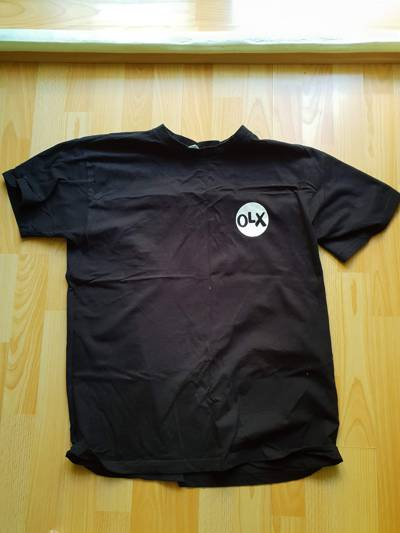

In [7]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

After executing the cell, we should see an image of a T-shirt.

To use this image in a neural network, we need to resize it because the models always expect images of a certain size (299 x 299 or 224 x 224 or 150 x 150). For example, the network we use in this lesson requires a 150 x 150 image or a 299 x 299 image.

To resize the image, specify the `target_size` parameter:

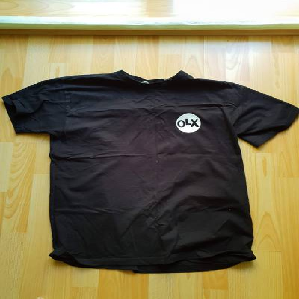

In [8]:
img = load_img(fullname, target_size=(299, 299))
img

As a result, the image becomes square and a bit squashed.

In [9]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x7C2016535570>


The library for processing images is called PIL (Python Image Library), which is what many libraries use for processing images.

The `img` variable is an `Image` object, which we need to convert to a NumPy array. It's easy to do:

array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 254, 247]],

       [[188, 179, 112],
        [187, 178, 111],
        [186, 177, 108],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 191, 126],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [183, 135,  25],
        [181, 133,  22],
        [183, 135,  24]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [182, 134,  23]]], dtype=uint8)
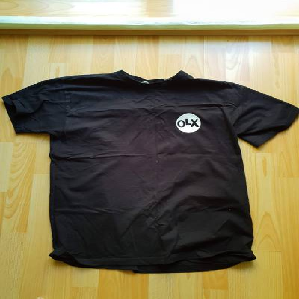

In [10]:
x = np.array(img)
x

This array should have the same shape as the image. Let's check it:

In [11]:
x.shape

(299, 299, 3)

We see `(299, 299, 3)`. It contains three dimensions:
- The width of the image: 299
- The height of the image: 299
- The number of channels: red, green, blue

For each of these channels, we have an array and this array contains numbers between 0 and 255, which is 1 byte. So, each cell is a number. Then, we actually have three such channels (RGB).

A value of an original image cell would be a combination of three values (red, green, blue) from each color channel. For example, a value of a black t-shirt image cell has probably almost 0 in all these three channels. This is how images are encoded internally and in our case, it will be an array of size 299 x 299. Each of these rows is a pixel.     

This is how we turn an image that we load with Keras into a NumPy array. The dtype of this NumPy array is uint8 (unsigned integer)--it doesn't have a sign so it goes from 0 to 255 and not from -127 to 128. It's basically an integer that takes 8 bits or 1 byte.

Let's now use a neural network to classify this image.

## 8.3 Pre-trained convolutional neural networks

Neural networks are a class of machine learning models for solving classification and regression problems. Our problem is a classification problem--we need to determine the category of an image.

However, our problem is special: we're dealing with images. This is why we need a special type of neural network--a convolutional neural network, which can extract visual patterns from an image and use them to make predictions.

Pre-trained neural networks are available on the internet, so let's see how we can use one of them for this project.

> **IMPORTANT:** If you rent a GPU from a cloud provider (such as AWS), don't forget to turn it off after you finish. It's not free and you might get a large bill at the end of the month.

### Using a pre-trained model

Training a convolutional neural network from scratch is a time-consuming process and requires a lot of data and powerful hardware. It may take weeks of non-stop training for large datasets like ImageNet with 14 million images.

Luckily, we don't need to do it ourselves: we can use pre-trained models. Usually, these models are trained on ImageNet and can be used for general-purpose image classification.

It's very simple, and we don't even need to download anything ourselves--Keras will take care of it automatically. We can use many different types of models (called *architectures*). You can find a good summary of available pre-trained models in the official Keras documentation.

* ImageNet dataset: https://www.image-net.org/
  * An image database that has 14,197,122 images of 21841 classes
* Pre-trained models: https://keras.io/api/applications/
  * Provides a list of pre-trained deep learning models

The `keras.applications` module has different pre-trained models with different architectures. We'll use the model Xception, which takes the input image size of (229, 229), and each image's pixel is scaled between `-1` and `1`.

We create the instance of the pre-trained model using `model = Xception(weights='imagenet', input_shape=(299, 299, 3))`. Our model will use the weights from pre-trained ImageNet and expect the input shape of (299, 299, 3) for images.

Along with image size, the model also expects the `batch_size`, which is the size of the batches of data (default 32). If one image is passed to the model, then the expected shape of the model should be (1, 299, 299, 3).

The image data was preprocessed using `preprocess_input` function during `Xception` model's pre-training. Therefore, we'll have to use this function on our data before making predictions, like so: `X = preprocess_input(X)`.

The `pred = model.predict(X)` function returns 2D array of shape `(1, 1000)`, where 1000 is the probability of the image classes. `decode_predictions(pred)` can be used to get the class names and their probabilities in readable format.

In order to make the pre-trained model useful with specific to our case, we'll have to do some tweak, which we'll do in the coming sections.

**Classes, functions, and methods:**
- `from tensorflow.keras.applications.xception import Xception`: import the model from Keras applications
- `from tensorflow.keras.application.xception import preprocess_input`: function to perform preprocessing on images
- `from tensorflow.keras.applications.xception import decode_predictions`: extract the predictions class names in the form of a tuple of list
- `model.predict(X)`: function to make predictions on the test images


For this project, we'll use Xception, a relatively small model that has good performance. First, we need to import the model itself and some helpful functions:

In [12]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

We imported three things:
- `Xception`: the actual model
- `preprocess_input`: a function for preparing the image to be used by the model
- `decode_prediction`: a function for decoding the model's prediction

Let's load this model:

In [13]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


We specify two parameters here:
- `weights`: We want to use a pre-trained model from ImageNet.
- `input_shape`: The size of the input images: height, width, and the number of channels. We resize the images to 299 x 299, and each image has three channels: red, green, and blue.

When we load it for the first time, it downloads the actual model from the internet. After it's done, we can use it.

Let's test it on the image we saw previously.

In [14]:
X = np.array([x])
X

array([[[[179, 171,  99],
         [179, 171,  99],
         [181, 173, 101],
         ...,
         [251, 253, 248],
         [251, 253, 248],
         [251, 254, 247]],

        [[188, 179, 112],
         [187, 178, 111],
         [186, 177, 108],
         ...,
         [251, 252, 247],
         [251, 252, 247],
         [251, 252, 246]],

        [[199, 189, 127],
         [200, 190, 128],
         [200, 191, 126],
         ...,
         [250, 251, 245],
         [250, 251, 245],
         [250, 251, 245]],

        ...,

        [[165, 151,  76],
         [173, 159,  84],
         [171, 157,  82],
         ...,
         [183, 135,  25],
         [181, 133,  22],
         [183, 135,  24]],

        [[165, 151,  76],
         [173, 159,  84],
         [171, 157,  82],
         ...,
         [182, 134,  23],
         [180, 132,  21],
         [182, 134,  23]],

        [[165, 151,  76],
         [173, 159,  84],
         [171, 157,  82],
         ...,
         [181, 133,  22],
        

The model doesn't expect to get just a single image. It gets a *batch* of images--several images put together in one array. This array should have four dimensions:
- The number of images
- The width
- The height
- The number of channels

For example, for 10 images, the shape is `(10, 299, 299, 3)`. Because we have just one image, we need to create a batch with this single image:

```python
X = np.array([x])
```

> **NOTE:** If we had several images, for example, `x`, `y`, and `z`, we'd write:
> ```python
> X = np.array([x, y, z])
> ```

Let's check its shape:

In [15]:
X.shape

(1, 299, 299, 3)

As we see, it's `(1, 299, 299, 3)`--it's one image of size 299 x 299 with three channels.

Before we can apply the model to our image, we need to prepare it with the `preprocess_input` function:

In [16]:
X = preprocess_input(X)
X

array([[[[ 0.4039216 ,  0.3411765 , -0.2235294 ],
         [ 0.4039216 ,  0.3411765 , -0.2235294 ],
         [ 0.41960788,  0.35686278, -0.20784312],
         ...,
         [ 0.96862745,  0.9843137 ,  0.94509804],
         [ 0.96862745,  0.9843137 ,  0.94509804],
         [ 0.96862745,  0.99215686,  0.9372549 ]],

        [[ 0.47450984,  0.4039216 , -0.12156862],
         [ 0.4666667 ,  0.39607847, -0.12941176],
         [ 0.45882356,  0.38823533, -0.15294117],
         ...,
         [ 0.96862745,  0.9764706 ,  0.9372549 ],
         [ 0.96862745,  0.9764706 ,  0.9372549 ],
         [ 0.96862745,  0.9764706 ,  0.92941177]],

        [[ 0.56078434,  0.48235297, -0.00392157],
         [ 0.5686275 ,  0.4901961 ,  0.00392163],
         [ 0.5686275 ,  0.49803925, -0.01176471],
         ...,
         [ 0.9607843 ,  0.96862745,  0.92156863],
         [ 0.9607843 ,  0.96862745,  0.92156863],
         [ 0.9607843 ,  0.96862745,  0.92156863]],

        ...,

        [[ 0.2941177 ,  0.18431377, -0

This function converts the integers between 0 and 255 in the original array to numbers between -1 and 1.

Now, we're ready to use the model.

### Getting predictions

To apply the model, use the `predict` method:

In [17]:
pred = model.predict(X)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


array([[3.23711836e-04, 1.57383591e-04, 2.13492880e-04, 1.52370281e-04,
        2.47625838e-04, 3.05035559e-04, 3.20591673e-04, 1.47499086e-04,
        2.03621545e-04, 1.49272208e-04, 1.95662607e-04, 2.10137077e-04,
        7.59263858e-05, 1.13972041e-04, 1.62683296e-04, 2.04638316e-04,
        1.97415677e-04, 1.44288526e-04, 1.40217293e-04, 1.73685708e-04,
        7.46689271e-04, 2.56966392e-04, 2.66808347e-04, 2.96513928e-04,
        3.73601768e-04, 2.77403975e-04, 2.16570523e-04, 2.27269804e-04,
        3.80812591e-04, 1.72165528e-04, 3.05400579e-04, 1.96431050e-04,
        3.92114598e-04, 4.78070957e-04, 2.91751028e-04, 3.25693021e-04,
        1.47395025e-04, 1.62361990e-04, 2.12710453e-04, 1.34028072e-04,
        2.40070149e-04, 6.75210846e-04, 2.54943065e-04, 1.44478545e-04,
        4.12820926e-04, 2.04408367e-04, 3.02957895e-04, 1.49339408e-04,
        1.99653441e-04, 2.27005512e-04, 2.93728866e-04, 2.27444340e-04,
        6.37643505e-04, 7.82614632e-04, 2.49556906e-04, 4.052700

In [18]:
pred.shape

(1, 1000)

This array is quite large--it contains 1,000 elements.

In [19]:
pred[0, :10]

array([0.00032371, 0.00015738, 0.00021349, 0.00015237, 0.00024763,
       0.00030504, 0.00032059, 0.0001475 , 0.00020362, 0.00014927],
      dtype=float32)

This Xception model predicts whether an image belongs to one of 1,000 classes, so each element in the prediction array is the probability of belonging to one of these classes.

We don't know what these classes are, so it's difficult to make sense from this prediction just by looking at the numbers. Luckily, we can use a function, `decode_predictions`, that decodes the prediction into meaningful class names:

In [20]:
decode_predictions(pred)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


[[('n03595614', 'jersey', 0.68196356),
  ('n02916936', 'bulletproof_vest', 0.038139995),
  ('n04370456', 'sweatshirt', 0.034324735),
  ('n03710637', 'maillot', 0.011354207),
  ('n04525038', 'velvet', 0.0018453562)]]

It shows the top five most likely classes for this image.

Not quite the result we expected. Most likely, images like this T-shirt are not common in ImageNet, and that's why the result isn't useful for our problem.

Even though these results aren't particularly helpful for us, we can use this neural network as a base model for solving our problem.

To understand how we can do it, we should first get a feeling for how convolutional neural networks work. Let's see what happens inside the model when we invoke the `predict` method.

## 8.4 Convolutional neural networks
* Types of layers: convolutional and dense
* Convolutional layers and filters
* Dense layers

All neural networks are organized in layers. We take an image, pass it through all the layers, and, at the end, get the predictions.

Usually, a model has a lot of layers. For example, the Xception model we use here has 71 layers. That's why these neural networks are called "deep" neural networks--because they have many layers.

For a convolutional neural network, the most important layers are:
- Convolutional layers
- Dense layers

### What is Convolutional Neural Network?

A convolutional neural network, also known as CNN or ConvNet, is a feed-forward neural network that is generally used to analyze visual images by processing data with grid-like topology. A CNN is used to detect and classify objects in an image. In CNNs, every image is represented in the form of an array of pixel values.

The convolution operation forms the basis of any CNN. In a convolution operation, the arrays are multiplied element-wise, and the dot product is summed to create a new array, which represents $w_x$.

### Layers in a Convolutional Neural Network

A convolution neural network has multiple hidden layers that help in extracting information from an image. The four important layers in CNN are:
1. Convolution layer
2. ReLU layer
3. Pooling layer
4. Fully connected layer (also called Dense layer)

**Convolution layer**

This is the first step in the process of extracting valuable features from an image. A convolution layer has several filters that perform the convolution operation. Every image is considered as a matrix of pixel values.

Consider a black and white image of 5x5 size whose pixel values are either 0 or 1, and also a filter matrix with a dimension of 3x3. Next, slide the filter matrix over the image and compute the dot product to get the convoluted feature matrix.

**ReLU layer**

Once the feature maps are extracted, the next step is to move them to a ReLU layer. ReLU (Rectified Linear Unit) is an activation function which performs an element-wise operation and sets all the negative pixels to 0. It introduces non-linearity to the network, and the generated output is a rectified feature map.

The ReLU function is: `f(x) = max(0, x)`.

**Pooling layer**

Pooling is a down-sampling operation that reduces the dimensionality of the feature map. The rectified feature map goes through a pooling layer to generate a pooled feature map.

Imagine a rectified feature map of size 4x4 goes through a max pooling filter of 2x2 size with stride of 2. In this case, the resultant pooled feature map will have a pooled feature map of 2x2 size, where each value will represent the maximum value of each stride.

The pooling layer uses various filters to identify different parts of the image like edges, shapes, etc.

**Fully Connected layer**

The next step in the process is called flattening. Flattening is used to convert all the resultant 2D arrays from pooled feature maps into a single linear vector. This flattened vector is then fed as input to the fully connected layer to classify the image.

### Convolutional Neural Networks in a nutshell

- The pixels from the image are fed to the convolutional layer that performs the convolution operation.
- It results in a convoluted feature map.
- The convoluted feature map is applied to a ReLU function to generate a rectified feature map.
- The image is processed with multiple convolutions and ReLU layers for locating the features.
- Different pooling layers with various filters are used to identify specific parts of the image.
- The pooled feature map is flattened and fed to a fully connected layer to get the final output.

There are more layers. For a more in-depth introduction to this topic, read the CS231n notes here: https://cs231n.github.io/

**Links:**
- Learn CNN in the browser: https://poloclub.github.io/cnn-explainer/

### Convolutional layers

Even though "convolutional layer" sounds complicated, it's nothing more than a set of filters--small "images" with simple shapes like stripes.

The filters in a convolutional layer are learned by the model during training. However, because we are using a pre-trained neural network, we don't need to worry about it; we already have the filters.

To apply a convolutional layer to a picture, we slide each filter across this image. For example, we can slide it from left to right and from top to bottom.

While sliding, we compare the content of the filter with the content of the image under the filter. For each comparison, we record the degree of similarity. This way, we get a *feature map*--an array with numbers, where a large number means a match between the filter and the image, and a low number means no match.

So, a feature map tells us where on the image we can find the shape from the filter.

One convolutional layer consists of many filters, so we actually get multiple feature maps--one for each filter.

Now, we can take the output of one convolutional layer and use it as the input to the next layer.

From the previous layer, we know the location of different stripes and other simple shapes. When two simple shapes occur in the same location, they form more complex patterns--crosses, angles, or circles.

That's what the filters of the next layer do: they combine shapes from the previous layer into more complex structures. The deeper we go down the network, the more complex patterns the network can recognize.

We repeat this process to detect more and more complex shapes. This way, the network "learns" some distinctive features of the image. For clothes, it can be short or long sleeves or the type of neck. For animals, it can be pointy or floppy ears or the presence of whiskers.

At the end, we get a vector representation of an image: a one-dimensional array, where each position corresponds to some high-level visual features. Some parts of the array may correspond to sleeves, whereas other parts represent ears and whiskers. At this level, it's usually difficult to make sense from these features, but they have enough discriminative power to distinguish between a T-shirt and pants or between a cat and a dog.

Now, we need to use this vector representation to combine these high-level features and arrive at the final decision. For that, we use a different kind of layers--dense layers.


### Dense layers

Dense layers process the vector representation of an image and translate these visual features to the actual class--T-shirt, dress, jacket, or other class.

To understand how it works, let's take a step back and think how we could use logistic regression for classifying images.

Suppose we want to build a binary classification model for predicting whether an image is a T-shirt. In this case, the input to logistic regression is the vector representation of an image--a feature vector $x$.
$$y = \{0, 1\}, \text{where 0 is not T-shirt and 1 is T-shirt.} $$

From lesson 3, we know that to make the prediction, we need to combine the features in $x$ with the weights vector $w$ and then apply the sigmoid function to get the final prediction:
$$g(x) = sigmoid(x^Tw)$$

We can show it visually by taking all the components of the vector $x$ and connecting them to the output--the probability of being a T-shirt.

What if we need to make predictions for multiple classes? For example, we may want to know if we have an image of a T-shirt, shirt, or dress. In this case, we can build multiple logistic regressions--one for each class.

By putting together multiple logistic regression models, we just created a small neural network!

To make it visually simpler, we can combine the outputs into one layer--the output layer.

When we have 10 classes we want to predict, we have 10 elements in the output layer. To make a prediction, we look at each element of the output layer and take the one with the highest score. In binary classification model, we use sigmoid. In multi-class classification model, we use softmax (similar to sigmoid but it's a generalization of sigmoid to multiple classes).

In this case, we have a network with one layer: the layer that converts the input to the output.

This layer is called a *dense layer*. It's "dense" because it connects each element of the input with all the elements of its output. For this reason, these layers are sometimes called "fully connected". A dense layer is nothing else but matrix multiplication.

However, we don't have to stop at just one output layer. We can add more layers between the input and the final output.

So, when we invoke `predict`, the image first goes through a series of convolutional layers. This way, we extract the vector representation of this image. Next, this vector representation goes through a series of dense layers, and we get the final prediction.

> **NOTE:** In this course, we give a simplified and high-level overview of the internals of convolutional neural networks. Many other layers exist in addition to convolutional layers and dense layers. For a more in-depth introduction to this topic, check the CS231n notes (https://cs231n.github.io/convolutional-networks/).

Summary:
- Convolutional layers role: Extract vector representation
- Dense layers role: Make predictions

Now, let's get back to code and see how we can adjust a pre-trained neural network for our project.

## 8.5 Transfer learning

Training a convolutional neural network takes a lot of time and requires a lot of data. But there's a shortcut: we can use *transfer learning*, an approach where we adapt a pre-trained model to our problem.
* Reading data with `ImageDataGenerator`
* Train `Xception` on smaller images (150x150)

(Better to run it with a GPU)

The difficulty in training usually comes from convolutional layers. To be able to extract a good vector representation from an image, the filters need to learn good patterns. For that, the network has to see many different images--the more, the better. But once we have a good vector representation, training dense layers is relatively easy.

This means that we can take a neural network pre-trained on ImageNet and use it for solving our problem. This model has already learned good filters. So, we take this model and keep the convolutional layers, but drop the dense layers and instead, train new ones.

Transfer learning is a machine learning method where a model developed for a task is re-used as the starting point for a model on a second task. Usually, a pre-trained model is trained with large volume of images and that is why the convolutional layers and vector representation of this model can be used for other tasks as well. However, the dense layers need to be re-trained because they are specific to the dataset to make predictions with.

In this lesson, we do exactly that. But before we can start training, we need to get our dataset ready.

Following are the steps to create train/validation data for model:
```python
# Build image generator for training (takes preprocessing input function)
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Load train dataset into train generator
train_ds = train_gen.flow_from_directory(directory='path/to/train_imgs_dir', # Train images directory
target_size=(150, 150), # Resize images to train faster
batch_size=32) # Set 32 images per batch

# Create image generator for validation
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Load image for validation
val_ds = val_gen.flow_from_directory(directory='path/to/val_imgs_dir', # Validation image directory
target_size=(150, 150),
batch_size=32,
shuffle=False) # False for validation
```

Following are the steps to build model from a pre-trained model:
```python
# Build base model
base_model = Xception(weights='imagenet',
                      include_top=False, # To create custom dense layer
                      input_shape=(150, 150, 3))

# Freeze the convolutional base by preventing the weights from being updated during training
base_model.trainable = False

# Define expected image shape as input
inputs = keras.Input(shape=(150, 150, 3))

# Feed inputs to the base model
base = base_model(inputs, training=False) # Set False because the model contains BatchNormalization layer

# Convert matrices into vectors using pooling layer
vectors = keras.layers.GlobalAveragePooling2D()(base)

# Create dense layer of 10 classes
outputs = keras.layers.Dense(10)(vectors)

# Create model for training
model = keras.Model(inputs, outputs)
```

Following are the steps to instantiate optimizer and loss function:
```python
# Define learning rate
learning_rate = 0.01

# Create optimizer
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

# Define loss function
loss = keras.losses.CategoricalCrossentropy(from_logits=True) # To keep the raw output of dense layer without applying softmax

# Compile the model
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy']) # Evaluation metric accuracy
```

The model is ready to train once it is defined and compiled:
```python
# Train the model, validate it with validation data, and save the training history
history = model.fit(train_ds, epochs=10, validation_data=val_ds)
```

**Classes, function, and attributes:**
- `from tensorflow.keras.preprocessing.image import ImageDataGenerator`: to read the image data and make it useful for training/validation.
- `flow_from_directory()`: method to read the images directly from the directory.
- `next(train_ds)`: to unpack features and target variables.
- `train_ds.class_indices`: attribute to get classes according to the directory structure.
- `GlobalAveragePooling2D()`: accepts 4D tensor as input and operates the mean on the height and width dimensionalities for all the channels and returns vector representation of all images.
- `CategoricalCrossentropy()`: method to produce a one-hot array containing the probable match for each category in multi-class classification.
- `model.fit()`: method to train model.
- `epochs`: number of iterations over all of the training data.
- `history.history`: history attribute is a dictionary recording loss and metrics values (accuracy in our case) for each epoch.

In previous lessons, we loaded the entire dataset into memory and used it to get X--the matrix with features. With images, it's more difficult: we may not have enough memory to keep all the images.

Keras comes with a solution--`ImageDataGenerator`. Instead of loading the entire dataset into memory, it loads the images from disk in small batches. Let's use it:

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
# Applies the preprocess_input function to each image
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    # Loads all the images from the train directory
    './clothing-dataset-small/train',
    # Resizes the images to 150 x 150
    target_size=(150, 150),
    # Loads the images in batches of 32 images
    batch_size=32
)

Found 3068 images belonging to 10 classes.


We already know that images need to be preprocessed using the `preprocess_input` function. That's why we need to tell `ImageDataGenerator` how the data should be prepared.

We have a generator now, so we just need to point it to the directory with the data. For that, use the `flow_from_directory` method.

For our initial experiments, we use small images of size 150 x 150. This way, it's faster to train the model. Also, the small size makes it possible to use a laptop for training.


We have 10 classes of clothing in our dataset, and images of each class are stored in a separate directory. For example, all T-shirts are stored in the t-shirt folder. The generator can use the folder structure to infer the label for each image.

When we execute the cell, it informs us how many images there are in the train dataset and how many classes.

Let's see what kind of classes are there:

In [23]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

These classes are the same as folders in the clothing dataset small train. It inferred the names of the classes from the folder structure so everything that is inside the t-shirt folder is place under the t-shirt class.

Let's look at what this train dataset generates. `train_ds` is a generator or iterator so it is able to get the next batch. We'll need to use `next()` to iterate through the generator.

In [24]:
X, y = next(train_ds)
X[:5]

array([[[[ 0.70980394,  0.58431375,  0.45882356],
         [ 0.7254902 ,  0.60784316,  0.4431373 ],
         [ 0.52156866,  0.4039216 ,  0.22352946],
         ...,
         [ 0.05098045, -0.1607843 , -0.3960784 ],
         [ 0.02745104, -0.18431371, -0.41960782],
         [ 0.01176476, -0.19999999, -0.4352941 ]],

        [[ 0.7176471 ,  0.58431375,  0.4431373 ],
         [ 0.49803925,  0.37254906,  0.19215691],
         [ 0.52156866,  0.39607847,  0.20000005],
         ...,
         [ 0.02745104, -0.18431371, -0.41960782],
         [ 0.02745104, -0.18431371, -0.41960782],
         [ 0.01176476, -0.19999999, -0.4352941 ]],

        [[ 0.69411767,  0.5529412 ,  0.39607847],
         [ 0.5529412 ,  0.41176474,  0.23921573],
         [ 0.5529412 ,  0.41960788,  0.21568632],
         ...,
         [ 0.01176476, -0.19999999, -0.4352941 ],
         [ 0.02745104, -0.18431371, -0.41960782],
         [ 0.01176476, -0.19999999, -0.4352941 ]],

        ...,

        [[ 0.33333337,  0.13725495, -0

In [25]:
y[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

It returns two things: our feature images and y labels.

Here, the labels that we have are one-hot encoded. For example, `[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]` means we have longsleeve (index 2).

This is the same one-hot encoding method but applied to the target variable. That's how we usually do multi-class classification. You can also think of this as 10 different binary variables and then we sort of fit 10 different models even though we actually fit only one but you can conceptually think as if we're fitting 10 different binary classification models and each is predicting if it's dress or not dress, and then if it is pants or not pants, or if it's t-shirt or not t-shirt.

In [26]:
X.shape

(32, 150, 150, 3)

Now, we repeat the same process for the validation dataset:

In [27]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


Like previously, we use the train dataset for training the model and the validation dataset for selecting the best parameters.

By default, it shuffles the dataset but for validation dataset, since we only use it for validating, it doesn't need to be shuffled--it's okay if the images come in the same order every time.

We have loaded the data, and now we're ready to train a model.

#### Creating the model
First, we need to load the base model--this is the pre-trained model that we're using for extracting the vector representation from images. Like previously, we also use Xception, but this time, we include only the part with pre-trained convolutional layers. After that, we add our own dense layers.

So, let's create the base model:

In [28]:
base_model = Xception(
    # Uses the model pre-trained on ImageNet
    weights='imagenet',
    # Keeps only the convolutional layers
    include_top=False,
    # Images should be 150 x 150 with three channels
    input_shape=(150, 150, 3)
)

base_model.trainable = False

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Note the `include_top` parameter: this way, we explicitly specify that we're not interested in the dense layers of the pre-trained neural network, only in the convolutional layers. In Keras terminology, the "top" is the set of final layers of the network (the input to the network is on the bottom and the output is on the top, so `include_top=False` means "don't include the final dense layers.").

We don't want to train the base model; attempting to do so will destroy all the filters. So, we "freeze" the base model by setting the `trainable` parameter to False.

In [29]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

outputs = base

model = keras.Model(inputs, outputs)

In [30]:
preds = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


In [31]:
preds.shape

(32, 5, 5, 2048)

What `preds` outputs is actually a 4-dimensional thing after it passes through a bunch of convolutional layers in a neural network. The original image we had is also 4-dimensional. The shape is 32 by 5 by 5 by 2048. This isn't the vector representation yet because it's actually a 3-dimensional thing (5 x 5 x 2048). So what we want to do now with this thing is to turn it into a vector (1-dimensional) and use that as the vector representation. We have something that takes in what we call `base` and turns it into a bunch of vectors (kind of slice it, take our average, and then put it into our vector representation).

This separation when we take something that is 3-dimensional or 2-dimensional and represent it in a smaller dimensionality is called pooling. In this particular case, we need 2D average pooling because we take an average of each of these squares and because we turn a 3-dimensional thing into a 1-dimensional thing.

In Keras, it's called `GlobalAveragePooling2D()`. So, we apply this pooling to base and we get back the vectors. The vectors would be the output.

In [32]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = vectors

model = keras.Model(inputs, outputs)

In [33]:
preds = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [34]:
preds.shape

(32, 2048)

Now, the shape is 32 by 2048. We managed to shrink this into a one-dimensional vector for each of the images.

However, we're not done yet. We still need to do one more thing: have a dense layer on top of that to turn the vectors into predictions. What we want to have at the end is an array of 32 by 10 with their predictions (`outputs`) because that is actually what we want to output. 32 is the size of our batch.

For turning vectors into outputs, we want to create a dense layer.

Now, let's build the clothing classification model:

In [35]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

# We have 10 different classes
outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [36]:
preds = model.predict(X)
preds[:5]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[-0.0108695 , -0.47018135,  0.9893781 , -0.20048067, -0.7322669 ,
         0.53886247, -0.9365108 ,  0.1621005 ,  0.868266  ,  0.2584991 ],
       [ 0.9451083 , -0.9056141 ,  1.5955203 , -0.40672   , -1.0147948 ,
         0.15367652, -1.5822152 , -1.8260264 , -0.25038382, -0.08887146],
       [ 0.32512072,  0.49483582,  0.8605565 ,  0.878307  , -0.5760302 ,
        -0.49255925, -1.1170521 , -0.7553319 ,  0.22515881, -1.2427447 ],
       [ 0.6011964 , -0.12907499,  1.1794844 ,  1.0003731 , -0.5263744 ,
         0.34437406, -0.5039233 , -0.94657266,  0.16787095, -1.0260155 ],
       [-0.26887473,  0.43437052,  0.4463032 ,  0.40965998, -0.42437842,
         0.37527862, -1.123982  , -0.3281526 , -0.156883  , -1.3771248 ]],
      dtype=float32)

In [37]:
preds.shape

(32, 10)

The way we build the model is called the "functional style." It may be confusing at first, so let's take a look at each line individually.

First, we specify the input and the size of the arrays we expect.

Next, we create the base model.

Even though `base_model` is already a model, we use it as a function and give it two parameters--`inputs`, and `training=False`:
- The first parameter says what will be the input to `base_model`. It will come from `inputs`.
- The second parameter (`training=False`) is optional and says that we don't want to train the base model.

The result is `base`, which is a *functional component* (like `base_model`) that we can combine with other components. We use it as the input to the next layer.

Here, we create a pooling layer--a special construction that allows us to convert the output of a convolutional layer (a 3-D array) into a vector (a one-dimensional array).

After creating it, we immediately invoke it with `base` as the argument. This way, we say that the input to this layer comes from `base`.

This may be a bit confusing because we create a layer and immediately connect it to base. We can rewrite it to make it simpler to understand:

```python
# Creates a pooling layer first
pooling = keras.layers.GlobalAveragePooling2D()
# Connects it to base
vectors = pooling(base)
```

As a result, we get `vector`. This is another functional component that we can connect to the next layer--a dense layer.

Similarly, we first create the layer, and then connect it to `vector`. For now, we create a network with only one dense layer. It's enough to get started.

Now, the results is `outputs`--the final result that we want to get out of the network.

So, in our case, the data comes into `inputs` and goes out of `outputs`. We just need to do one final step--wrap both `inputs` and `outputs` into a `Model` class.

We need to specify two parameters here:
- What the model will get as input, which is `inputs` in our case.
- What the output of the model is, which is `outputs`.

Let's take a step back and look at the model definition code again, following the flow of data from `inputs` to `outputs`.

> The flow of data: an image goes to `inputs`, then `base_model` converts it to `base`, then pooling converts it to `vector`, and then a dense layer converts it to `output`. At the end, `inputs` and `outputs` go to a Keras model.

To make it easier to visualize, we can think of every line of code as a block, which gets the data from the previous block, transforms it, and passes it to the next block.

So, we have created a model that can take in an image, get the vector representation using the base model, and make the final prediction with a dense layer.

Let's train it now.

#### Training the model

We have specified the model: the input, the elements of the model (the base model, the pooling layer), and the final output layer.

Now, we need to train it. For that, we need an *optimizer*, which adjusts the weights of a network to make it better at doing its task.

We won't cover the details of how optimizers work--that's beyond the scope for this course, and it's not required to finish the project. But if you'd like to learn more about them, check the CS231n notes (https://cs231n.github.io/neural-networks-3/). You can see the list of available optimizers in the official documentation for Keras (https://keras.io/api/optimizers/).

For our project, we will use the Adam optimization algorithm--a good default choice, and in most cases, using it is sufficient.

Let's create it:

In [38]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

Adam requires one parameter: the `learning_rate`, which specifies how fast our network learns. This is similar to `eta` in XGBoost.

The learning rate may significantly affect the quality of our network. If we set it too high, the network learns too fast and may accidentally skip some important details. In this case, the predictive performance is not optimal. If we set it too low, the network takes too long to train, so the training process is highly ineffective.

We will later adjust this parameter. For now, we set it to 0.01--a good default value to start with.

To train a model, the optimizer needs to know whether the model is doing well. For that, it uses a loss function, which becomes smaller as the network becomes better. The goal of the optimizer is to minimize this loss.

The `keras.losses` package offers many different losses. Here's a list of the most important ones:
- `BinaryCrossentropy`: For training a binary classifier
- `CategoricalCrossentropy`: For training a classification model with multiple classes
- `MeanSquaredError`: For training a regression model

Because we need to classify clothing into 10 different classes, we use the categorical cross-entropy loss.

For this loss, we specify one parameter: `from_logits=True`. We need to do this because the last layer of our network outputs raw scores (called "logits"), not probabilities. The official documentation recommends using `from_logits=True` for numerical stability (https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy).

Logits is the raw output of the dense layer before we apply softmax. If we have softmax, we have probabilities. If we don't include softmax, we have raw scores. So, we say that we want to use raw scores so we don't use activation here. And let's say if we wanted to have the probabilities, then we would use `from_logits=False`.

> **NOTE:** Alternatively, we could define the last layer of the network like this:
> ```python
>       outputs = keras.layers.Dense(10, activation='softmax')(vector)
>```
> In this case, we explicitly tell the network to output probabilities: softmax is similar to sigmoid but for multiple classes. Then, the output is not "logits" anymore, so we can drop this parameter:
> ```python
>       loss = keras.losses.CategoricalCrossentropy()
>```

Now, let's put the optimizer and the loss together. For that, we use the `compile` method of our model.

In addition to the optimizer and the loss, we also specify metrics we want to track during training. We're interested in accuracy: the percentage of images with correct predictions.

Our model is ready for training! To do it, use the `fit` method:

In [39]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 32s 267ms/step - accuracy: 0.5856 - loss: 1.6791 - val_accuracy: 0.7478 - val_loss: 0.9607
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.8212 - loss: 0.5332 - val_accuracy: 0.7390 - val_loss: 1.1197
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.8695 - loss: 0.4179 - val_accuracy: 0.7859 - val_loss: 0.8812
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.9128 - loss: 0.2567 - val_accuracy: 0.7947 - val_loss: 0.8014
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.9446 - loss: 0.1552 - val_accuracy: 0.8152 - val_loss: 0.9044
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.9524 - loss: 0.1387 - val_accuracy: 0.7889 - val_loss: 0.9310
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.9723 - loss: 0.0794 - val_accuracy: 0.7977 - val_loss: 0.8895
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - accuracy: 0.9889 - loss: 0.0405 - val_accuracy: 0.8006 - val_los

We specify three parameters:
- `train_ds`: The dataset for training
- `epochs`: The number of times it will go over the training data
- `validation_data`: The dataset for evaluation

One iteration over the entire training dataset is called an *epoch*. The more iterations we do, the better the network learns the training dataset.

At some point, it can learn the dataset so well that it starts overfitting. To know when this happens, we need to monitor the performance of our model on the validation dataset. That's why we specify the `validation_data` parameter.

The accuracy on the validation seems to oscillate around 80 and the accuracy on the training is quite high so it's clearly overfitting.

When we start training, Keras informs us about the progress. From that, we can see:
- The speed of training: how long each epoch takes.
- The accuracy on the train and validation datasets. We should monitor the accuracy on the validation set to make sure the model doesn't start overfitting. For example, if the validation accuracy decreases for multiple epochs, it's a sign of overfitting.
- The loss on training and validation. We're not interested in loss--it's less intuitive and the values are harder to interpret.

**NOTE:** Your results will likely be different. The overall predictive performance of the model should be similar, but the exact numbers will not be the same. With neural networks, it's a lot more difficult to ensure perfect reproducibility, even with fixing random seeds.


In [40]:
history.history

{'accuracy': [0.6681877374649048,
  0.8155149817466736,
  0.8604954481124878,
  0.9119947552680969,
  0.9377444386482239,
  0.9481747150421143,
  0.9693611264228821,
  0.9882659912109375,
  0.9967405200004578,
  0.9957627058029175],
 'loss': [1.2897870540618896,
  0.5910585522651672,
  0.42829498648643494,
  0.26827144622802734,
  0.16625888645648956,
  0.14546619355678558,
  0.08237817138433456,
  0.04738051816821098,
  0.030408943071961403,
  0.024089399725198746],
 'val_accuracy': [0.7478005886077881,
  0.7390029430389404,
  0.7859237790107727,
  0.7947214245796204,
  0.8152492642402649,
  0.7888563275337219,
  0.7976539731025696,
  0.8005865216255188,
  0.8123167157173157,
  0.803519070148468],
 'val_loss': [0.9606817960739136,
  1.119654893875122,
  0.8812277317047119,
  0.8013762831687927,
  0.9043729305267334,
  0.9309938549995422,
  0.8894619345664978,
  0.9674885869026184,
  0.9330782890319824,
  0.9527347087860107]}

In [41]:
history.history['accuracy']

[0.6681877374649048,
 0.8155149817466736,
 0.8604954481124878,
 0.9119947552680969,
 0.9377444386482239,
 0.9481747150421143,
 0.9693611264228821,
 0.9882659912109375,
 0.9967405200004578,
 0.9957627058029175]

In [42]:
history.history['val_accuracy']

[0.7478005886077881,
 0.7390029430389404,
 0.7859237790107727,
 0.7947214245796204,
 0.8152492642402649,
 0.7888563275337219,
 0.7976539731025696,
 0.8005865216255188,
 0.8123167157173157,
 0.803519070148468]

We're interested in the training and validation accuracy.

Let's plot them:

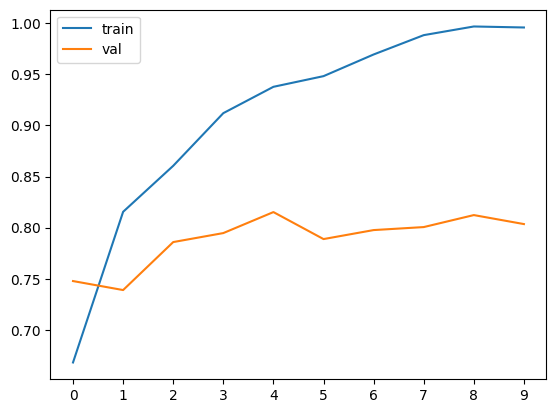

In [43]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

Let's zoom in on the validation accuracy:

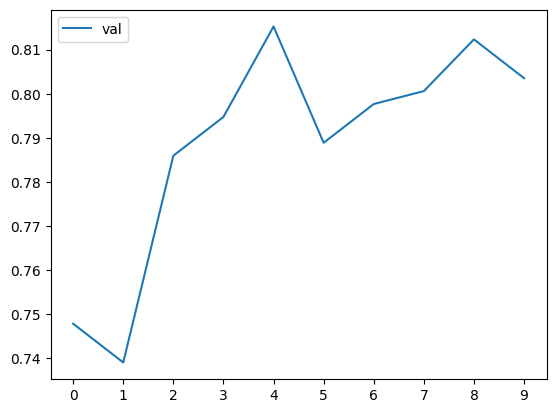

In [44]:
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

As you can see, the model quickly becomes 99% accurate on the train dataset, but the score on validation stays around 80% for all the epochs.

The perfect accuracy on the train data doesn't necessarily mean that our model overfits, but it's a good sign that we should adjust the learning rate parameter. We have previously mentioned that it's an important parameter, so let's tune it now.

> **Recap:** Transfer learning is the process of using a pre-trained model (a base model) for converting an image to its vector representation and then training another model on top of it.

## 8.6 Adjusting the learning rate
One of the most important hyperparameters of deep learning models is the learning rate. It is a tuning parameter in an optimization function that determines the step size (how big or small) at each iteration while moving toward a minimum of a loss function.
* What's the learning rate
* Trying different values

Imagine you have a book, and you want to read it. The *learning rate* represents how fast you can read and absorb its content. If you read the book very quickly, you risk forgetting important parts and struggling to recall key details when you need to apply them. On the other hand, reading slowly allows you to study each concept thoroughly and understand it deeply, ensuring better retention. However, if you read too slowly, you might never finish the book. The goal is to find the right reading pace, or learning rate, that balances comprehension and efficiency. Reading too fast may result in superficial understanding, while reading too slowly might mean not acquiring knowledge quickly enough to meet your goals. By maintaining a moderate, balanced pace, you can maximize understanding and effectively apply what you've learned.

This analogy relates to training machine learning models. Training a model is like reading a book: you're trying to "learn" from the data. Applying that knowledge during testing or validation corresponds to validating the model. If you train the model too quickly (with a high learning rate), it may overfit, memorizing the training data without generalizing well to new data. If you train it too slowly (with a low learning rate), it may underfit, failing to learn enough patterns from the data. A balanced learning rate ensures the model acquires sufficient knowledge and performs well on both training and validation data.

We have started with a learning rate of 0.01. It's a good starting point, but it's not necessarily the best rate: we have seen that our model learns too fast and after a few epochs predicts the train set with 100% accuracy.

We can experiment with different learning rates to find the optimal value where the model has the best results. Let's experiment and try other values for this parameter.

First, to make it easier, we should put the logic for creating a model in a separate function. This function takes learning rate as a parameter.

In [45]:
# Function to create model
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    # Create architecture
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    # Compile the model
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

Next, we can loop over the list of learning rates:

In [46]:
# Create a dictionary to store history with different learning rates
scores = {}

# List of learning rates
for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 155ms/step - accuracy: 0.2742 - loss: 2.1047 - val_accuracy: 0.5073 - val_loss: 1.5935
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.5475 - loss: 1.4384 - val_accuracy: 0.6012 - val_loss: 1.2573
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.6245 - loss: 1.1805 - val_accuracy: 0.6686 - val_loss: 1.0844
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.6728 - loss: 1.0341 - val_accuracy: 0.7009 - val_loss: 0.9759
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.7185 - loss: 0.9251 - val_accuracy: 0.7302 - val_loss: 0.9041
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.7271 - loss: 0.8717 - val_accuracy: 0.7478 - val_loss: 0.8529
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.7520 - loss: 0.7989 - val_accuracy: 0.7625 - val_loss: 0.8100
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - accuracy: 0.7624 - loss: 0.7425 - val_accuracy

Visualizing the training and validation accuracies help us to determine which learning rate value is the best for the model. One typical way to determine the best value is by looking at the gap between training and validation accuracy. The smaller the gap indicates the optimal value of the learning rate.

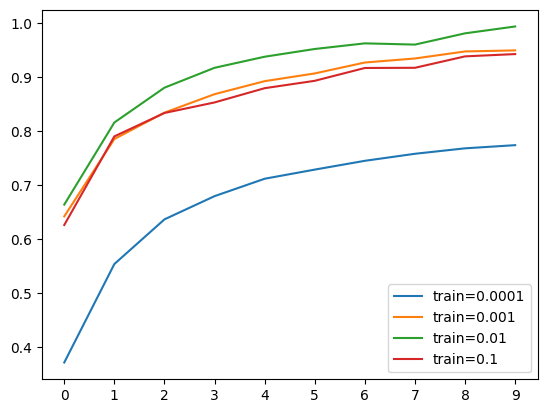

In [47]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

As we see, for 0.001, the training accuracy doesn't go up as fast as with 0.01, but with 0.0001, it goes up very slowly. The network in this case learns too slow--it *underfits*.

Let's take a look at the validation accuracy.

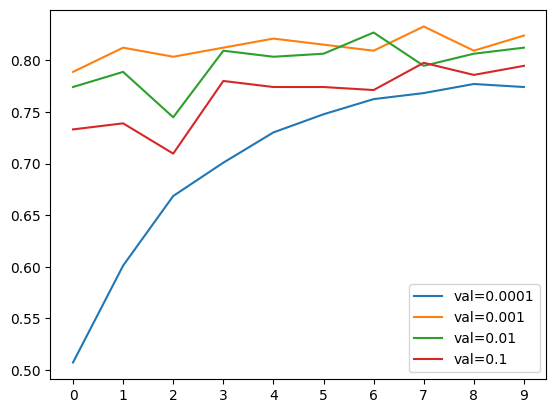

In [48]:
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

If we look at validation scores for all the learning rates, we see that the learning rate of 0.001 is the best one.

Let's remove 0.0001 and 0.1 from the plot to zoom in on the performance of 0.001 and 0.01.

In [49]:
del scores[0.1]
del scores[0.0001]

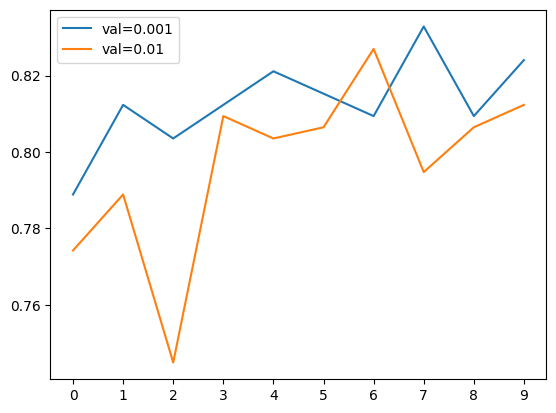

In [50]:
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

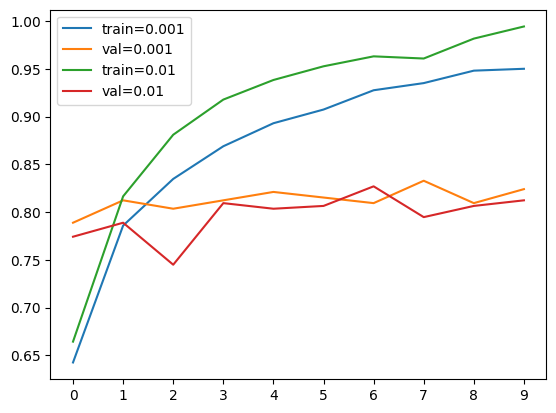

In [51]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

For the learning rate of 0.001, the best accuracy on validation is 83%.

| Learning rate | 0.01 | 0.001 | 0.0001 |
| :-: | :-: | :-: | :-: |
| **Validation accuracy** | 82.7% | 83.0% | 78.0% |

> **NOTE:** Your numbers may be slightly different. It's also possible that in your experiments, the learning rate of 0.01 achieves slightly better results than 0.001.

The difference between 0.01 and 0.001 is not significant. But if we look at the accuracy on the training data, with 0.01, it overfits the training data a lot faster. At some point, it even achieves an accuracy of 100%. When the discrepancy between the performance on train and validation sets is high, the risk of overfitting is also high. So, we should prefer the learning rate of 0.001.

We'll use 0.001 for training subsequent versions of the model.  


In [52]:
learning_rate = 0.001

After training is done, we need to save the model. Now, we'll see how to do it.

## 8.7 Checkpointing

* Saving the best model only
* Training a model with callbacks

`ModelCheckpoint` callback is used with training the model to save a model or weights in a checkpoint file at some interval so that the model or weights can be loaded at a later time to continue the training from the saved state or to use for deployment.

**Classes, functions, and attributes:**
- `keras.callbacks.ModelCheckpoint`: ModelCheckpoint class from keras callbacks api
- `filepath`: path to save the model file
- `monitor`: the metric name to monitor
- `save_best_only`: only save when the model is considered the best according to the metric provided in `monitor`
- `model`: overwrite the saved file based on either maximum or the minimum scores according to the metric provided in `monitor`

Once the model is trained, we can save it using the `save_weights` or `save` method:

In [53]:
# model.save_weights('model_v1.h5', save_format='h5')
model.save('model_v1.keras')

We need to specify the following:
- The output file: `'model_v1.h5'` (depreciated) `'model_v1.keras'` (recommended)
- The format: h5, which is a format for saving binary data

You may have noticed that while training, the performance of our model on the validation set jumps up and down. This way, after 10 iterations, we don't necessarily have the best model--maybe the best performance was achieved on iteration 5 or 6.

We can save the model after each iteration, but it generates too much data. And if we rent a server in the cloud, it can quickly take all the available space.

Instead, we can save the model only when it's better than the previous best score on validation. For example, if the previous best accuracy is 0.8, but we have improved it to 0.91, we save the model. Otherwise, we continue the training process without saving the model.

This process is called *model checkpointing*. Keras has a special class for doing it: `ModelCheckpoint`. Let's use it:

In [54]:
checkpoint = keras.callbacks.ModelCheckpoint(
    # Specifies the filename template for saving the models
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.keras',
    # Saves the model only when it's better than previous iterations
    save_best_only=True,
    # Uses the accuracy on validation for selecting the best model
    monitor='val_accuracy',
    # Maximize the accuracy to be as high as possible
    mode='max'
)

The first parameter is a template for the filename. It has two parameters inside:
- `{epoch:02d}` is replaced by the number of the epoch.
- `{val_accuracy:.3f}` is replaced by the validation accuracy.

Because we set `save_best_only` to `True`, `ModelCheckpoint` keeps track of the best accuracy and saves the results to disk each time the accuracy improves.

We implement `ModelCheckpoint` as a callback--a way to execute anything after each epoch finishes. In this particular case, the callback evaluates the model and saves the result if the accuracy gets better.

We can use it by passing it to the `callbacks` argument of the `fit` method:

In [55]:
learning_rate = 0.001

# Creates a new model with the best learning rate
model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    # Specifies the list of callbacks to be used during training
    callbacks=[checkpoint]
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 170ms/step - accuracy: 0.5101 - loss: 1.4542 - val_accuracy: 0.7654 - val_loss: 0.7263
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.7835 - loss: 0.6394 - val_accuracy: 0.7859 - val_loss: 0.6276
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.8397 - loss: 0.4982 - val_accuracy: 0.8123 - val_loss: 0.6056
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.8589 - loss: 0.4350 - val_accuracy: 0.8123 - val_loss: 0.5709
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.8903 - loss: 0.3662 - val_accuracy: 0.8094 - val_loss: 0.5491
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - accuracy: 0.9014 - loss: 0.3287 - val_accuracy: 0.8299 - val_loss: 0.5565
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.9236 - loss: 0.2840 - val_accuracy: 0.8211 - val_loss: 0.5432
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.9350 - loss: 0.2481 - val_accuracy: 0.824

After a few iterations, we already have some models saved to disk. Because the `ModelCheckpoint` callback saves the model only when it improves, we only have 4 files with our model, not 10.

We've learned how to store the best model. Now, let's improve our model by adding more layers to the network.

## 8.8 Adding more layers
It is possible to add more layers between the `vector representation layer` and the `output layer` to perform intermediate processing of the vector representation. These layers are the same dense layers as the output but the difference is that these layers use `relu` activation function for non-linearity.
* Adding one inner dense layer
* Experimenting with different sizes of inner layer

Previously, we trained a model with one dense layer. We don't have to restrict ourselves to just one layer, so let's add another layer between the base model (vector representation) and the last layer with predictions (output). Usually, adding one or two more inner layers helps the neural network becomes more powerful.

For example, we can add a dense layer of size 100:
```python
inner = keras.layers.Dense(100, activation='relu')(vectors)
```

> **NOTE:** There's no particular reason for selecting the size of 100 for the inner dense layer. We should treat it as a parameter: as with the learning rate, we can try different values and see which one leads to better performance on validation.

Like learning rates, we should also experiment with different values of inner layer sizes:

In [56]:
# Function to define model by adding new dense layer
# Default layer size is 100
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    # Adds another dense layer of size 'size_inner'
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

    # Instead of connecting outputs to vector, connects it to inner
    outputs = keras.layers.Dense(10)(inner)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    # Compile the model
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

Here, we set the `activation` parameter to `relu`.

Remember that we get a neural network by putting together multiple logistic regressions. In logistic regression, sigmoid is used for converting the raw score to probability. But for inner layers, we don't need probabilities, and we can replace sigmoid with other functions. These functions are called *activation functions*. ReLU (Rectified Linear Unit) is one of them, and for inner layers, it's a better choice than sigmoid. We don't use softmax because for our loss, we use `from_logits`.

ReLU = $0$ if $x \leq 0$ else $x$ if $x > 0$

**Activation functions**:
- Output
  - Sigmoid
  - Softmax
- Intermediate
  - ReLU
  - Tanh
  - Leaky ReLU
  - Maxout

The sigmoid function suffers from the vanishing gradient problem, which makes training deep neural networks impossible. ReLU solves this problem. To read more about this problem, and about activation functions in general, please refer to the CS231n notes (https://cs231n.github.io/neural-networks-1/).

So, each of the layers will have some activation. Activation is nothing else but some post-processing of the output of the dense vector.

Next, train the model with different sizes of inner layer:

In [57]:
# Create checkpoint to save best model for version 2
filepath = './xception_v2_{epoch:02d}_{val_accuracy:.3f}.keras'
checkpoint = keras.callbacks.ModelCheckpoint(filepath=filepath,
                                             save_best_only=True,
                                             monitor='val_accuracy',
                                             mode='max')

In [58]:
# Experiment different sizes of inner layer with the best learning rate
# Note: We should've added the checkpoint for training but for simplicity we are skipping it
learning_rate = 0.001

scores = {}

# List of inner layer sizes
for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds, callbacks=[checkpoint])
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 151ms/step - accuracy: 0.4619 - loss: 1.6625 - val_accuracy: 0.7243 - val_loss: 0.8611
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.7526 - loss: 0.7731 - val_accuracy: 0.7801 - val_loss: 0.7018
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - accuracy: 0.8017 - loss: 0.5977 - val_accuracy: 0.7918 - val_loss: 0.6548
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.8234 - loss: 0.5330 - val_accuracy: 0.8006 - val_loss: 0.6263
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.8635 - loss: 0.4329 - val_accuracy: 0.7859 - val_loss: 0.6039
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step - accuracy: 0.8904 - loss: 0.3640 - val_accuracy: 0.8065 - val_loss: 0.5926
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.9104 - loss: 0.3171 - val_accuracy: 0.7977 - val_loss: 0.6185
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.9220 - loss: 0.2908 - val_accuracy: 0.

We did not add checkpoint here (for simplicity) when in principle, we should have added it:

```python
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)
```

From Jupyter Notebook, we can create a new terminal to see how much our GPU is utilized:

```bash
# A utility command line tool from NVIDIA
nvidia-smi
```

During training, we just watch this command line utility keeps executing the command and outputs the results every 2s. We can see that our model is training and this is useful because let's say if we're training a model and we see that our GPU utilization is small (e.g., 40%-50%), then we know that we're not effectively utilizing our GPU and we need to do something about this to optimize this process somehow.

In [59]:
scores

{10: {'accuracy': [0.5814862847328186,
   0.7558670043945312,
   0.8034549951553345,
   0.837027370929718,
   0.8608213663101196,
   0.8852672576904297,
   0.900586724281311,
   0.9224250316619873,
   0.9335071444511414,
   0.9494785070419312],
  'loss': [1.306817650794983,
   0.7416684031486511,
   0.5865857005119324,
   0.5005497336387634,
   0.4327825903892517,
   0.37247157096862793,
   0.325763463973999,
   0.28858286142349243,
   0.25452446937561035,
   0.22253045439720154],
  'val_accuracy': [0.7243402004241943,
   0.7800586223602295,
   0.7917888760566711,
   0.8005865216255188,
   0.7859237790107727,
   0.8064516186714172,
   0.7976539731025696,
   0.8093841671943665,
   0.8093841671943665,
   0.8152492642402649],
  'val_loss': [0.8611166477203369,
   0.7018264532089233,
   0.6548313498497009,
   0.6262909770011902,
   0.6038680672645569,
   0.592644214630127,
   0.618486762046814,
   0.6042214632034302,
   0.608099639415741,
   0.5883510708808899]},
 100: {'accuracy': [0.6675

Let's plot it:

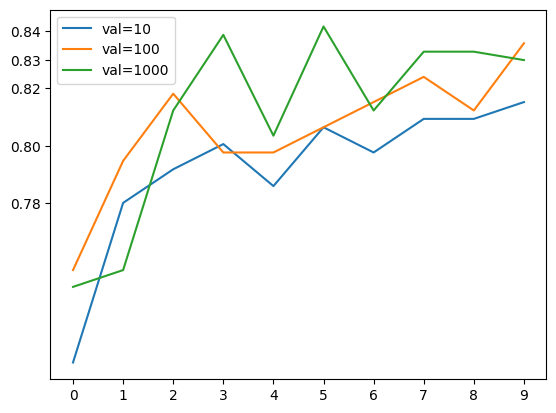

In [60]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.83, 0.84])
plt.legend()

We see that the inner layer of size 100 is the best one.

However, with another layer, our chances of overfitting increase significantly. To avoid that, we need to add regularization to our model.

> **NOTE:** It may not always be possible that the model improves. Adding more layers mean introducing complexity in the model, which may not be recommended in some cases.

In the next section, we'll try different regularization techniques to improve the model performance with the added inner layer.

## 8.9 Regularization and dropout
*Dropout* is one of the possible ways of regularizing our neural network. It is a special technique for fighting overfitting in neural networks.

The main idea behind dropout is freezing a part of a dense layer when training. At each iteration, the part to freeze is chosen randomly. Only the unfrozen part is trained, and the frozen part is not touched at all. As a result, the trained model works as an ensemble model consisting of multiple neural networks.
* Regularizing by freezing a part of the network
* Adding dropout to our model
* Experimenting with different values

Imagine we have an image that we want to classify as a t-shirt and then in this image, we see that there's this area (a circle with a logo inside it). If we train our model for 10 epochs, it means that our model will go over the image 10 times. And when it sees the image that many times, the neural network might recognize a pattern such that every time we see a logo like this, it must be a t-shirt. A rule like this might not actually generalize well because we might have a hoodie or some other clothings with this logo and the neural network might think the logo is associated with a t-shirt. This is not what we want. We want the neural network to focus on the overall shape like sleeves, collar, etc.

Therefore, if some parts of the network are ignored, the model overall is less likely to overfit. When the network goes over a batch of images, the frozen part of a layer doesn't see this data--it's turned off. This way, it's more difficult for the network to memorize the images.

For every batch, the part to freeze is selected randomly, so the network learns to extract patterns from incomplete information, which makes it more robust and less likely to overfit.

We can control the strength of dropout by setting the dropout rate--the fraction of elements in a layer to be frozen at each step. With dropout, the connections to frozen nodes are dropped out.

**Classes, functions, and attributes:**
- `tf.keras.layers.Dropout()`: dropout layer to randomly sets input units (e.g., nodes) to 0 with a frequency of rate at each epoch during training
- `rate`: argument to set the fraction of the input units to drop, it is a value of float between 0 and 1


To do this in Keras, we add a `Dropout` layer after the first `Dense` layer and set up the dropout rate.

Let's update the `make_model` function and add another parameter there for controlling the dropout rate:

In [61]:
# Function to define model by adding new dense layer and dropout
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    # Compile the model
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

```python
# Create checkpoint to save best model for version 3
filepath = './xception_v3_{epoch:02d}_{val_accuracy:.3f}.keras'
checkpoint = keras.callbacks.ModelCheckpoint(filepath=filepath,
                                             save_best_only=True,
                                             monitor='val_accuracy',
                                             mode='max')

```

This way, we add another block in the network--the dropout block. `Dropout` is another block between the `inner` layer and the `outputs` layer.

From previous experiments, we got the best values of learning rate `0.001` and inner layer size of `100`. We'll use these values for the next experiment along with different values of dropout rates.

Let's try four different values for the `droprate` parameter to see how the performance of our model changes:
- `0.0`: Nothing gets frozen, so this is equivalent to not including the dropout layer at all.
- `0.2`: Only 20% of the layer gets frozen.
- `0.5`: Half of the layer is frozen.
- `0.8`: Most of the layer (80%) is frozen.

With dropout, it takes more time to train a model: at each step, only a part of our network learns, so we need to make more steps. This means that we should increase the number of epochs when training.

So, let's train it:

In [62]:
# Create checkpoint to save best model for version 3
filepath = './xception_v3_{epoch:02d}_{val_accuracy:.3f}.keras'
checkpoint = keras.callbacks.ModelCheckpoint(filepath=filepath,
                                             save_best_only=True,
                                             monitor='val_accuracy',
                                             mode='max')

In [63]:
# Set the best values of learning rate and inner layer size based on previous experiments
learning_rate = 0.001
size = 100

# Dict to store results
scores = {}

# List of dropout rates
for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        # Experiment with different values of droprate
        droprate=droprate
    )

    # Train for longer (epochs=30) because of dropout regularization
    history = model.fit(train_ds,
                        epochs=30,
                        validation_data=val_ds,
                        callbacks=[checkpoint]
                       )
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 142ms/step - accuracy: 0.5910 - loss: 1.2142 - val_accuracy: 0.7830 - val_loss: 0.6381
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.8355 - loss: 0.4769 - val_accuracy: 0.8152 - val_loss: 0.5521
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.8890 - loss: 0.3398 - val_accuracy: 0.8270 - val_loss: 0.5311
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - accuracy: 0.9395 - loss: 0.2320 - val_accuracy: 0.8152 - val_loss: 0.5761
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.9618 - loss: 0.1591 - val_accuracy: 0.8299 - val_loss: 0.5660
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.9801 - loss: 0.1095 - val_accuracy: 0.8358 - val_loss: 0.5707
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - accuracy: 0.9846 - loss: 0.0852 - val_accuracy: 0.8299 - val_loss: 0.5833
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.9961 - loss: 0.0545 - val_accuracy: 0.8

> **NOTE:** Because we introduce dropout in the neural networks, we will need to train our model for longer, hence, number of epochs is set to `30`.

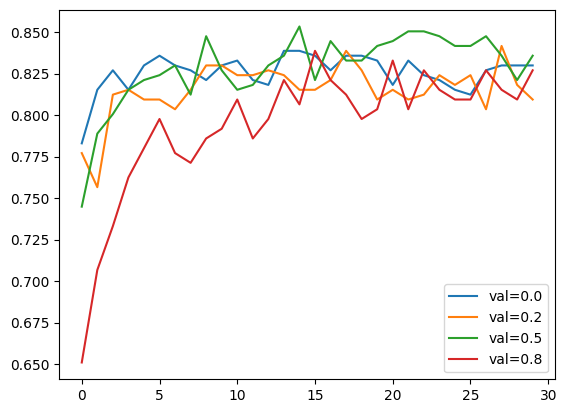

In [64]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.legend()

From the results on the validation dataset, we see that there's no significant difference between 0.0, 0.2, and 0.5. However, 0.8 is worse--we made it really difficult for the network to learn anything.

Let's zoom in on the plot:

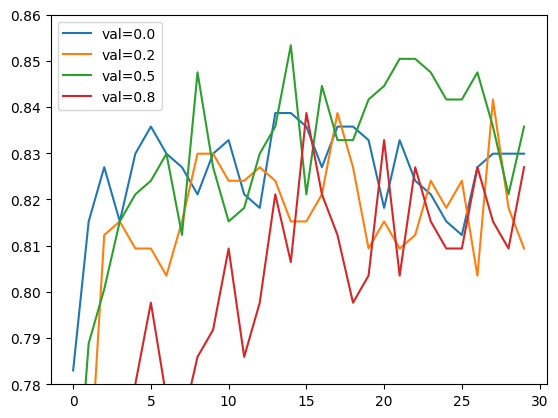

In [65]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()

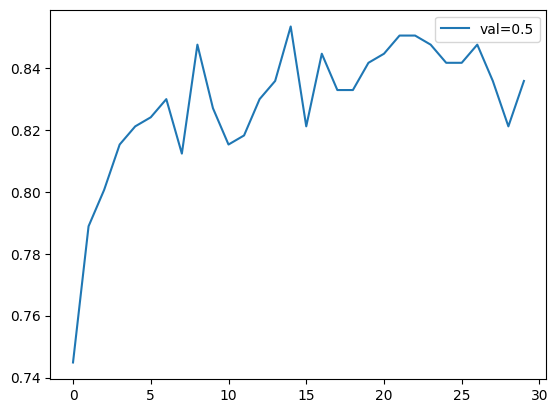

In [66]:
hist = scores[0.5]
plt.plot(hist['val_accuracy'], label='val=0.5')

plt.legend()

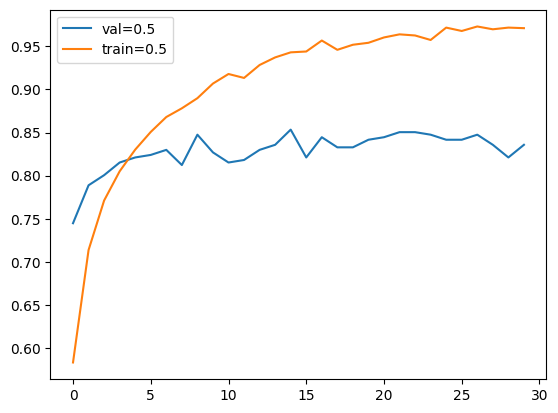

In [67]:
hist = scores[0.5]
plt.plot(hist['val_accuracy'], label='val=0.5')
plt.plot(hist['accuracy'], label='train=0.5')

plt.legend()

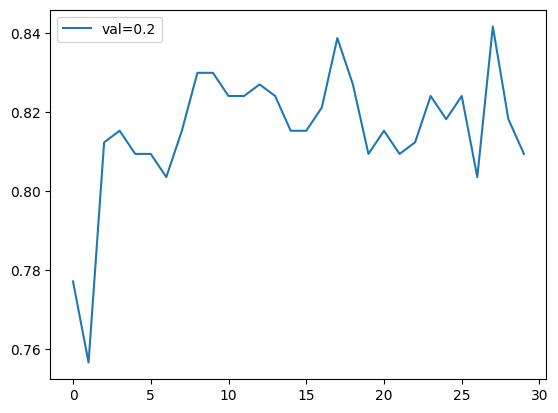

In [68]:
hist = scores[0.2]
plt.plot(hist['val_accuracy'], label='val=0.2')

plt.legend()

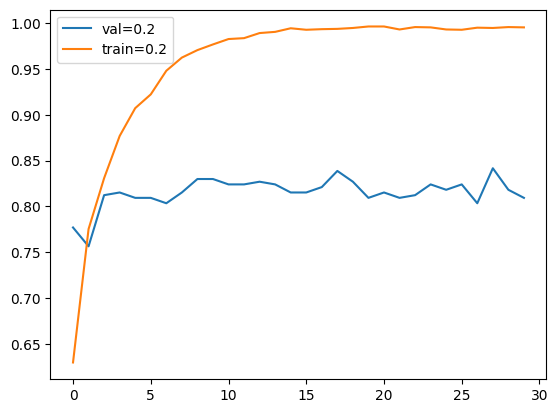

In [69]:
hist = scores[0.2]
plt.plot(hist['val_accuracy'], label='val=0.2')
plt.plot(hist['accuracy'], label='train=0.2')

plt.legend()

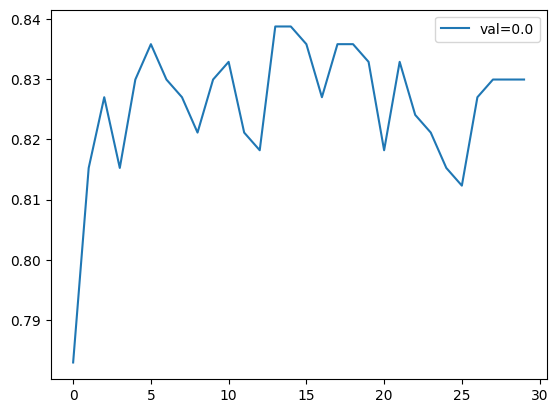

In [70]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label='val=0.0')

plt.legend()

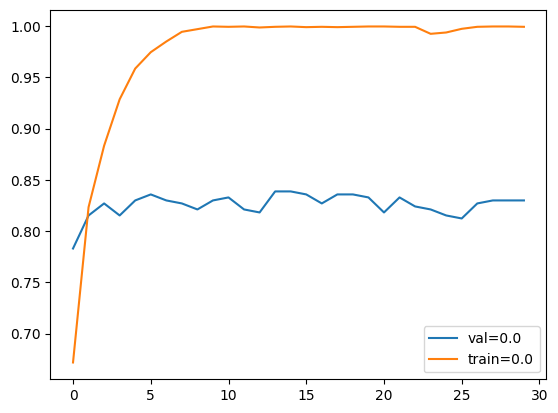

In [71]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label='val=0.0')
plt.plot(hist['accuracy'], label='train=0.0')

plt.legend()

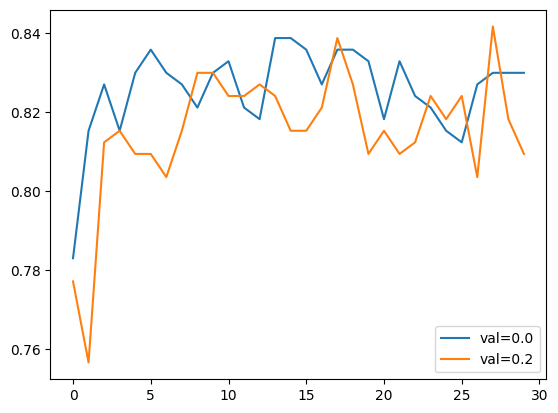

In [72]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label='val=0.0')

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label='val=0.2')

plt.legend()

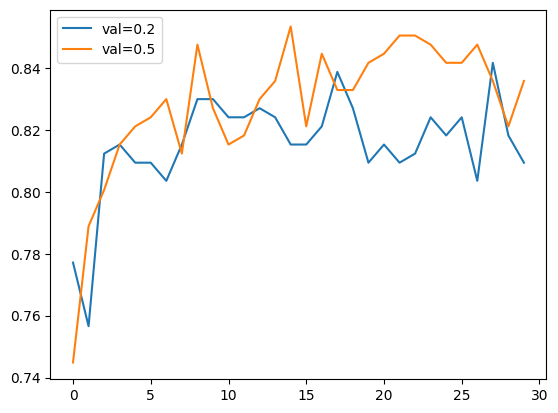

In [73]:
hist = scores[0.2]
plt.plot(hist['val_accuracy'], label='val=0.2')

hist = scores[0.5]
plt.plot(hist['val_accuracy'], label='val=0.5')

plt.legend()

The best accuracy on validation we could achieve is 84.5% for the dropout rate of 0.5.

| Dropout rate | 0.0 | 0.2 | 0.5 | 0.8 |
| :-: | :-: | :-: | :-: | :-: |
| **Validation accuracy** | 84.2% | 84.2% | 84.5% | 82.4% |

In cases like this, when there's no visible difference between accuracy on the validation dataset, it's useful to look at the accuracy on the train set as well.

With no dropout, the model quickly memorizes the entire train dataset, and after 10 epochs, it becomes 99.9% accurate. With a dropout rate of 0.2, it needs more time to overfit the training dataset, whereas for 0.5, it hasn't reached the perfect accuracy, even after 30 iterations. By setting the rate to 0.8, we make it really difficult for the nextwork to learn anything, so the accuracy is low even on the training dataset.

We can see that with a dropout rate of 0.5, the network doesn't overfit as fast as others, while maintaining the same level of accuracy on the validation dataset as 0.0 and 0.2. Thus, we should prefer the model we trained with the dropout rate of 0.5 to other models.

By adding another layer and dropout, we have increased the accuracy from 83% to 84%. Even though this increase is not significant for this particular case, dropout is a powerful tool for fighting overfitting, and we should use it when making our models more complex.

In addition to dropout, we can use other ways to fight overfitting. For example, we can generate more data. In the next section, we'll see how to do it.

> **Recap:** In dropout, we freeze a random part of a model, so it doesn't get updated during one iteration of training.

## 8.10 Data augmentation
Data augmentation is a process of artificially increasing the amount of data by generating new images from existing images. This includes adding minor alterations to images by flipping, cropping, adding brightness and/or contrast, and many more.
* Different data augmentations
* Training a model with augmentations
* How to select data augmentations?

Keras `ImageDataGenerator` class has many parameters for data augmentation that we can use for generating data. Important thing to remember is that the data augmentation should only be implemented on train data, not the validation data. Here's how we can generate augmented data for training the model:

```python
# Create image generator for train data and also augment the images
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
                               rotation_range=30,
                               width_shift_range=10.0,
                               height_shift_range=10.0,
                               shear_range=10,
                               zoom_range=0.1,
                               horizontal_flip=False,
                               vertical_flip=True)

train_ds = train_gen.flow_from_directory(directory='./clothing-dataset-small/train',
                                         target_size=(150, 150),
                                         batch_size=32)
```

**How to choose augmentations?**
- First step is to use our own judgement, for example, looking at the images (both on train and validation), does it make sense to introduce horizontal flip?
- Look at the dataset, what kind of variations are there? Are objects always centered?
- Augmentations are hyperparameters: like many other hyperparameters, often times, we need to test whether image augmentations are useful for the model or not. If the model doesn't improve or have same performance after certain epochs (let's say 20), in that case, we don't use it.

Usually, augmented data required longer training.

Getting more data is always a good idea, and it's usually the best thing we can do to improve the quality of our model. Unfortunately, it's not always possible to get more data.

For images, however, we can generate more data from existing images. For example:
* Flip an image vertically and horizontally.
* Rotate an image.
* Zoom in or out a bit.
* Change an image in other ways.

The process of generating more data from an existing dataset is called *data augmentation*.

The easiest way to create a new image from an existing one is to flip it horizontally, vertically, or both.

In our case, horizontal flipping might not make much sense, but vertical flipping should be useful. Horizontal flipping is useful only when images are upside down and we need to rotate them.

> **NOTE:** If you're curious how these images are generated, check out this notebook: https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/chapter-07-neural-nets/07-augmentations.ipynb

Rotating is another image-manipulation strategy that we can use: we can generate a new image by rotating an existing one by some degree. If the rotation degree is negative, the image is rotated anti-clockwise.

Shear is another possible transformation. It skews the image by "pulling" it by one of its sides. When the shear is positive, we pull the right side down, and when it's negative, we pull the right side up.

At first glance, the effect of shear and rotation may look similar, but actually, they are quite different. Shear changes the geometrical shape of an image, but rotation doesn't: it only rotates an image.

> **NOTE:** Shear changes the geometrical shape of an image by pulling it, so a square becomes a parallelogram. Rotation doesn't change the shape, so a square remains a square.

Next, we can shift an image horizontally or vertically.
* When shifting an image horizontally, positive values shift the image to the left, whereas negative values shift it to the right.
* When shifting an image vertically, positive values shift the image to the top, whereas negative values shift it to the bottom.

Finally, we can zoom an image in or out. When the zoom factor is smaller than 1, we zoom in. If it's larger than 1, we zoom out.
* In Keras, we can zoom in only along one axis (x-axis or y-axis).

There are many more other things we can do like playing with brightness or contrast, placing a black patch over the image, and etc.  

What is more, we can combine multiple data augmentation strategies. For example, we can take an image, flip it horizontally, zoom out, and then rotate it.

By applying different augmentations to the same image, we can generate many more new images.

Keras provides a built-in way of augmenting a dataset. It's based on `ImageDataGenerator`, which we have already used for reading the images.

The generator takes in many arguments. Previously, we used only `preprocessing_function`--it's needed to preprocess the images. Others are available, and many of them are responsible for augmenting the dataset.

For example, we can create a new generator:

```python
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,
    width_shift_range=10.0,
    height_shift_range=10.0,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=False,
    vertical_flip=True
)
```

Let's take a closer look at these parameters:
* `rotation_range=30`: Rotate an image by a random degree between -30 and 30.
* `width_shift_range=10.0`: Shift an image horizontally by a value between -10 and 10 pixels.
* `height_shift_range=10.0`: Shift an image vertically by a value between -10 and 10 pixels.
* `shear_range=10.0`: Apply the shear transformation by a value between -10 and 10 (also in pixels).
* `zoom_range=0.1`: Apply the zoom transformation using the zoom factor between 0.9 and 1.1 (1 - 0.1 and 1 + 0.1).
* `horizontal_flip=False`: Don't flip an image horizontally.
* `vertical_flip=True`: Flip an image vertically.

You might be wondering how to know which parameters to choose for augmentations:
* Use your own judgement
  * Looking at the images (both on train and validation), does it make sense to introduce horizontal flip? The images in our dataset are always positioned correctly so there are no images that are upside down.
* Look at the dataset, what kind of variations are there?
  * Are the objects always centered? If they are not, consider shifting or rotating the images.  
* Tune augmentations like a hyperparameter of our model
  * Often, we need to try different augmentations to see what works and what doesn't.
    * Should we add another layer?
    * Should we add dropout?
    * Should we add rotation?
  * Take your train dataset, add augmentation, and train for multiple epochs (10 - 20 epochs). Then, compare it with the same model but without the augmentation and see if the score on validation improves.
    * Is it better? If yes, then use it. If no, then don't use it. If same performance, then train for more epochs (preferably 20 more epochs).


For this project, let's take a small set of these augmentations (after experimenting):

In [ ]:
# Create image generator for train data and also augment the images
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    vertical_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Take note to apply augmentations only to training data. We don't use it for validation: we want to make our evaluation consistent and be able to compare a model trained on the augmented dataset with a model trained without augmentations.
* We can think of this as images that were uploaded by our users to our website. They won't be using Keras to rotate the image before uploading; they would just take a picture and upload it.

So, we use the generator in the same way as previously and load the validation dataset using exactly the same code as before.

We're ready to train a new model now:

In [ ]:
learning_rate = 0.001
size = 100
droprate = 0.5

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

To train this model, we need even more epochs than previously. Data augmentation is also a regularization strategy. Instead of training on the same image over and over again, the network sees a different variation of the same image for every epoch. This makes it more difficult for the model to memorize the data, and it decreases the chances of overfitting.

In [ ]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

After training this model, we managed to improve the accuracy by 1%, from 84% to 85%.

This improvement is not really significant. But we have experimented a lot, and we could do this relatively quickly because we used small images of size 150 x 150. Now, we can apply everything we have learned so far to larger images.

> **Recap:**
>
> Data augmentation helps fight overfitting because:
> * The model doesn't get to see the same images over and over again.
> * It adds a lot of variety into the dataset--rotations and other image transformations.
> * It generates examples of images that may exist, but the model otherwise wouldn't have seen.


## 8.11 Training a larger model
In this lesson, we increase the image input size from `150` to `299`, reduce the amount of data augmentation parameters, and lower the learning rate. This gives us the best results than any previous experiments.
* Train a 299x299 model

In [ ]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
input_size = 299

In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [ ]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

## 8.12 Using the model

* Loading the model
* Evaluating the model
* Getting predictions

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [ ]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

In [ ]:
model = keras.models.load_model('xception_v4_1_13_0.903.h5')

In [ ]:
model.evaluate(test_ds)

In [ ]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

In [ ]:
img = load_img(path, target_size=(299, 299))

In [ ]:
import numpy as np

In [ ]:
x = np.array(img)
X = np.array([x])
X.shape

In [ ]:
X = preprocess_input(X)

In [ ]:
pred = model.predict(X)

In [ ]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [ ]:
dict(zip(classes, pred[0]))

## 8.13 Summary

* We can use pre-trained models for general image classification
* Convolutional layers let us turn an image into a vector
* Dense layers use the vector to make the predictions
* Instead of training a model from scratch, we can use transfer learning and re-use already trained convolutional layers
* First, train a small model (150x150) before training a big one (299x299)
* Learning rate - how fast the model trains. Fast learners aren't always the best ones
* We can save the best model using callbacks and checkpointing
* To avoid overfitting, use dropout and data augmentation

## 8.14 Explore more

* Add more data, e.g. Zalando, etc (ADD LINKS)
* Albumentations - another way of generating augmentations
* Use PyTorch or MXNet instead of TensorFlow/Keras
* In addition to Xception, there are others architectures - try them

Other projects:

* cats vs dogs
* Hotdog vs not hotdog
* Category of images

